# Homework 4 Bayesian Statistics and Machine Learning
#### Deniz Ekiz
#### 2016700051

## Q1: 


Repeat the fake/fair coin example covered in class with a prior probability of form 0.5Beta(20,3) + 0.5Beta(3,20)
Derive the marginal likelhood and create plots similar to the ones in notes/ModelingExamples.ipynb section Fair/Fake coin.
## Solution 1:

Prior probability form =
$\begin{eqnarray}
\frac{\Gamma(23)}{\Gamma(20)\Gamma(3)}\left(x^{20+c1-1}(1-x)^{3+b-1} + x^{3+c1-1}(1-x)^{20+b-1} \right)
\end{eqnarray}$

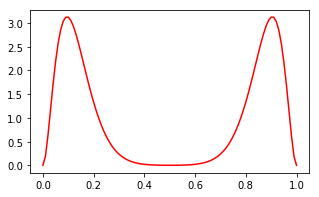

In [1]:
import matplotlib.pyplot as plt
from scipy.special import gammaln
import numpy as np
import scipy.special as sps
import math
a,b,N,c,p = 0,0,0,[0,0],np.arange(0.0,1.01,0.01)
def beta_pdf(x, a, b):
    y = math.gamma(23)/(math.gamma(20)*math.gamma(3))
    t = np.add(np.power(x,20+a-1)*np.power(1-x,3+b-1) , np.power(x,3+a-1)*np.power(1-x,20+b-1))
    y = np.divide(y*t,2)
    return y
plt.figure(figsize=(5,3))
plt.plot(p, beta_pdf(p, a+c[1], b+c[0]), 'r')
plt.show()

Let's start by asking, What is a fake coin? 

We can describe it with the following model.
  
$\pi|m   ~
     \begin{cases}
       \delta(\pi_1-0.5)&\quad  m=0 \quad fair \: coin \\
       0.5\beta(\pi;3,20)+0.5\beta(\pi;20,3)&\quad m=1 \quad fake \: coin \\
     \end{cases}
$


Graphical model:

<img src="images/graphical_model.jpeg" width='360' align='center'>
                            <center>Figure 1: The graphical model</center>



The formula for conditional probability is the following

$ p(m|x_{1:N}) = \dfrac{p(m,x_{1:N})}{p(x_{1:N})} $

We need to calculate marginal probabilities for $m=0$, and $m=1$

$
p(m=0,x_{1:N}) = \int d\pi p(x_{1:N},\pi,m=0)
$

Let's introduce some variables

Variables: 

$c_1$: Number of 1 (one)

$c_0$: Number of 0 (zero)

Total number of observations

$N = c_0 + c_1$ 

From the figure 1 where the graphical model is defined,



$
p(m=0,x_{1:N}) = \int d\pi p(m=0)p(\pi | m = 0) $$\prod_{i=1}^{n}  p(x_i|\pi)$$
$

$
= \int d\pi \dfrac{1}{2}\delta(\pi-\dfrac{1}{2})\pi^{c_1}(1-\pi)^{c_0}
$

$
= \dfrac{1}{2} \dfrac{1}{2}^{c_1} \dfrac{1}{2}^{c_0}
$

$
p(m=0,x_{1:N}) = \dfrac{1}{2}^{N+1}
$

Let's compute $p(m=1,x_{1:N})$ 

From the figure 1 where the graphical model is defined,

$
p(m=1,x_{1:N}) = \int d\pi p(m=1)p(\pi | m = 1) $$\prod_{i=1}^{n}  p(x_i|\pi)$$
$

From the integral of prior probability form and with normalization factor $\dfrac{\Gamma(23)}{\Gamma(20)+\Gamma(3)}$ 

A reader can check the integral of beta distribution for further references

$
= \dfrac{1}{2}\dfrac{\Gamma(23)}{\Gamma(20)+\Gamma(3)}
\left(\dfrac{\Gamma(20+c_1)\Gamma(3+c_0)}{\Gamma(23+N)} +
\dfrac{\Gamma(3+c1)\Gamma(20+c0)}{\Gamma(23+N)} \right)$


The log-odds is the ratio of marginal likelihoods

$$
l(X) = \log\left( \frac{p(X|m = \text{Fair})}{p(X|m = \text{Fake})} \right)
$$

If $l(X)>0$, we may conclude that the coin is fair and biased when $l<0$.


In [2]:
import numpy as np
import scipy.special as sps
import math

def log_odds(c_0, c_1):
    # Total number of tosses
    N = c_0 + c_1
    M_fair = N*np.log(0.5)
    M_fake= (0.5*math.gamma(23)/math.gamma(20)/math.gamma(3))
    #The inner sum
    inner_sum = math.gamma(20+c_1)*math.gamma(3+c_0)/math.gamma(N+23) + math.gamma(c_1+3)*math.gamma(c_0+20)/math.gamma(N+23)
    #the result
    M_fake = M_fake*(inner_sum)
    M_fake = np.log(M_fake)
    return M_fair - M_fake
# Number of Zeros observed
c_0 = 6
# Number of Ones
c_1 = 1
print('log_odds = ', log_odds(c_0, c_1) )

log_odds =  -1.13641225583


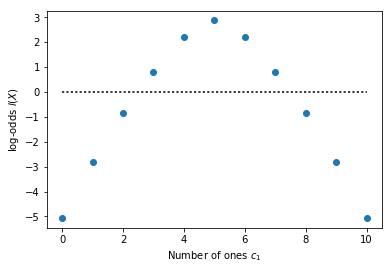

In [3]:
N = 10
l = np.zeros(N+1)
for c in range(0,N+1):
    l[c] = log_odds(N-c, c)
plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

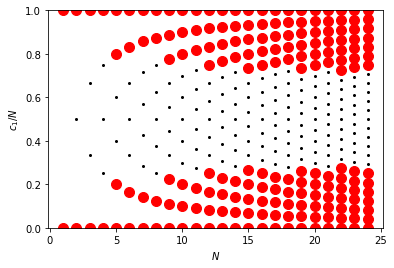

In [4]:
for N in range(1, 25):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        l[c] = log_odds(N-c, c)
    
    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,N+1)/N
    plt.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.r',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()

## Question from BOOKLET:
My observation:
0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1

We have two  $\pi$  values (parameters) which are $\pi_1$ and $\pi_2$

$\pi_1 \sim \beta (1,1)$

$\pi_2 \sim \beta (1,1)$
$\pi_2 =\beta (1,1) = \frac{\Gamma(1)\Gamma(1)}{\Gamma(2)}$

$X_i: $ 

$BE(x;\pi_1) \: i < m$

$BE(x;\pi_2) \: i \geq m$

$p(x_i|m,\pi_1,\pi_2) = BE(x;\pi)^{[i <m]}BE(x,\pi_2)^{[i\geq m]}   $

$=\pi_1^{x[i<m]}(1-\pi_1)^{(1-x)[1 <m]}  \pi_2^{x[i \geq m]}(1-\pi_2)^{(1-x)[1 \geq m]}$ 

We need to calculate marginal probabilities for each i within i=1 to N.


$= \int d\pi_1 \pi_1^{x[i<m]}(1-\pi_1)^{(1-x)[1 <m]} \int d\pi_2 \pi_2^{x[i \geq m]}(1-\pi_2)^{(1-x)[1 \geq m]} $

Variables:

x[i<m][0] =number of zeros before i'th number

x[i<m][1] =number of ones before i'th number

x[i>=m][0] =number of zeros after i'th number including itself

x[i>=m][1] =number of ones after i'th number including itself

$= \dfrac{1}{N}\left(\dfrac{\Gamma(2)}{\Gamma(1)\Gamma(1)}\dfrac{\Gamma(1+x[i<m][1])\Gamma(1+x[i<m][0])}{\Gamma(2+i)}\right)
\left(\dfrac{\Gamma(2)}{\Gamma(1)\Gamma(1)}\dfrac{\Gamma(1+x[i>=m][1])\Gamma(1+x[i>=m][0])}{\Gamma(2+N-i)}\right)$


In [5]:
obs = "00100100001000010010110011111111111011011111111111"
obs = [int(i) for i in obs]
#find i<m counts
def less_prob(obs,cp):
    tmp = obs[0:cp]
    return len(tmp) - np.sum(tmp),np.sum(tmp)
#find i>=m counts
def geq_prob(obs,cp):
    tmp = obs[cp:]
    return  len(tmp) - np.sum(tmp) , np.sum(tmp)

def count_update(obs):
    result =  []
    for i in range(0,len(obs)):
        x = {'i<m': {'0':0,'1':0},'i>=m': {'0':0,'1':0}}
        x['i<m']['0'],x['i<m']['1'] = less_prob(obs,i)
        x['i>=m']['0'],x['i>=m']['1'] = geq_prob(obs,i)
        result.append(x)
    return result
x = count_update(obs)
def marginal_likelihood(obs):
    all_x = count_update(obs)
    result = []
    N = len(obs)
    for i in range(0,N):
        x = all_x[i]
        #normalization
        tmp = (math.gamma(2)/(math.gamma(1)+math.gamma(1)))*(math.gamma(1+1)/(math.gamma(1)+math.gamma(1)))
        #less than
        tmp = tmp*math.gamma(x['i<m']['0']+1)*math.gamma(x['i<m']['1']+1)/math.gamma(2 + i)
        #greater than
        tmp = tmp*math.gamma(x['i>=m']['0']+1)*math.gamma(x['i>=m']['1']+1)/math.gamma(2+N-i)
        tmp = tmp/N
        result.append(tmp)
    return result

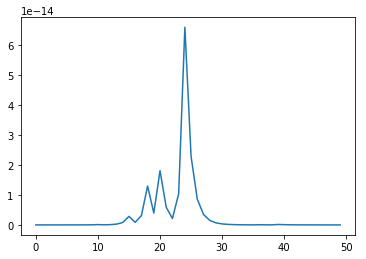

Most likely change point is 24


In [17]:
probs = marginal_likelihood(obs)
plt.plot(range(0,len(obs)),probs)
plt.show()
print("Most likely change point is",np.argmax(probs))